# Import Data Set

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
df = pd.read_csv("/content/WC_AT.csv")
df.head()

,Waist,AT,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,74.75,25.72,NaN,NaN,NaN
1,72.60,25.89,NaN,NaN,NaN
2,81.80,42.60,NaN,NaN,NaN
3,83.95,42.80,NaN,NaN,NaN
4,74.65,29.84,NaN,NaN,NaN


In [16]:
df

,Waist,AT,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,74.75,25.72,NaN,NaN,NaN
1,72.60,25.89,NaN,NaN,NaN
2,81.80,42.60,NaN,NaN,NaN
3,83.95,42.80,NaN,NaN,NaN
4,74.65,29.84,NaN,NaN,NaN
...,...,...,...,...,...
104,100.10,124.00,NaN,NaN,NaN
105,93.30,62.20,NaN,NaN,NaN
106,101.80,133.00,NaN,NaN,NaN
107,107.90,208.00,NaN,NaN,NaN


In [17]:
# select required columns only
df = df[['Waist','AT']]
df

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


# Correlation Analysis

<Axes: xlabel='Waist', ylabel='AT'>

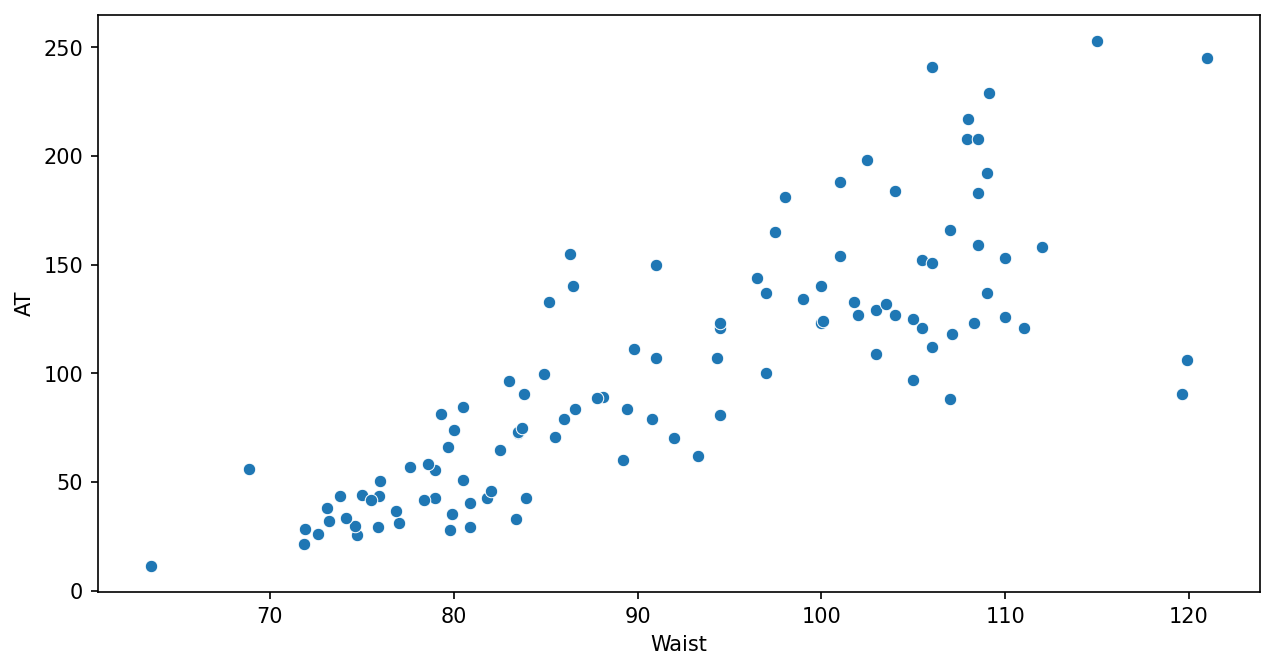

In [6]:
sns.scatterplot(x = df['Waist'], y = df['AT'])

In [7]:
df.corr() # check daily vs sunday

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


<Axes: >

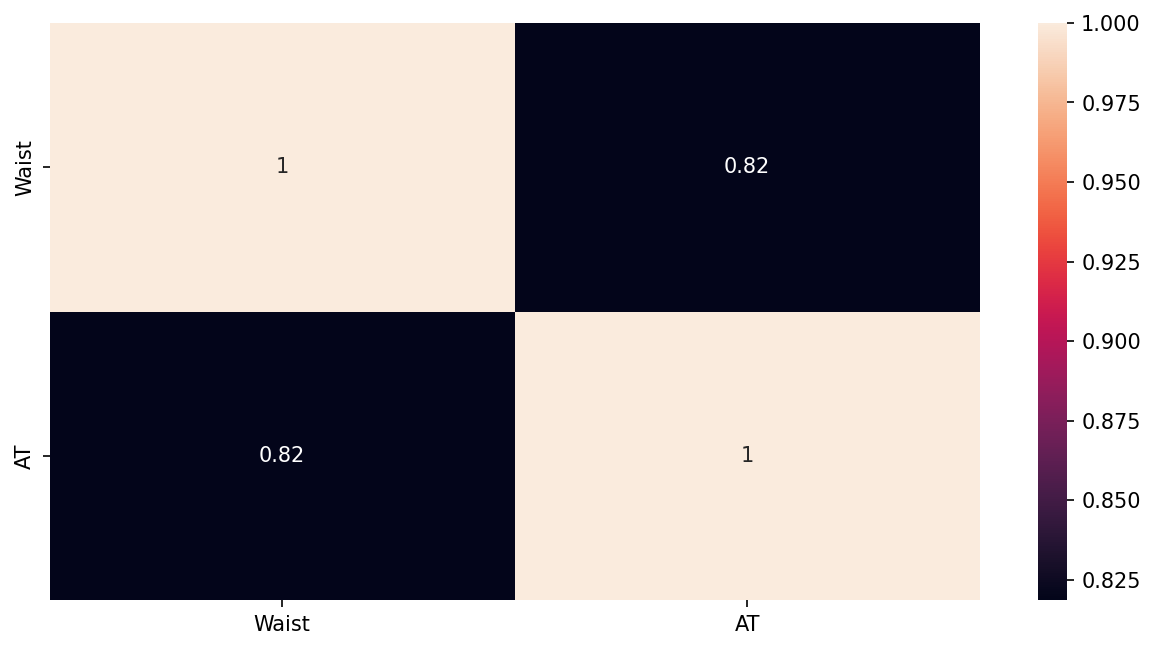

In [12]:
sns.heatmap(df.corr(),annot=True)

Fitting a Linear Regression Model

In [19]:
# statsmodels library is used for multiple purposes like statistical calculations, hypothesis testing, linear regression model building, etc
import statsmodels.formula.api as smf # model - Regression model, "Y~X", OR "Dependent_variable~Independent_Variable"
model = smf.ols("AT~Waist",data = df).fit() # Ordinary Least Squares, y Dep. variable - sunday, then give ~ symbol and then x Ind.Variable - daily,
                                                  # dataset - data, fit() - fit the regression line

In [20]:
#Coefficients are c or B0 and m or B1
model.params
# Reg. Equn: Sunday = B0+B1*daily
# In output: Intercept(i.e. best fit line is intersecting y axis at 13.83) - B0, daily - coefficient of daily i.e.B1
# m=1.33
# c=13.83
# Sunday = 13.83 + 1.33 * daily
# we assumed daily circulation as 200
# So Sunday = 13.83 + 1.33 * 200

,0
Intercept,-215.981488
Waist,3.458859


In [21]:
sun=13.83+1.33*200
sun

279.83

In [22]:
#R squared values - 0.92 - Good reg. equn.
model.rsquared

0.670036893052843

<Axes: xlabel='Waist', ylabel='AT'>

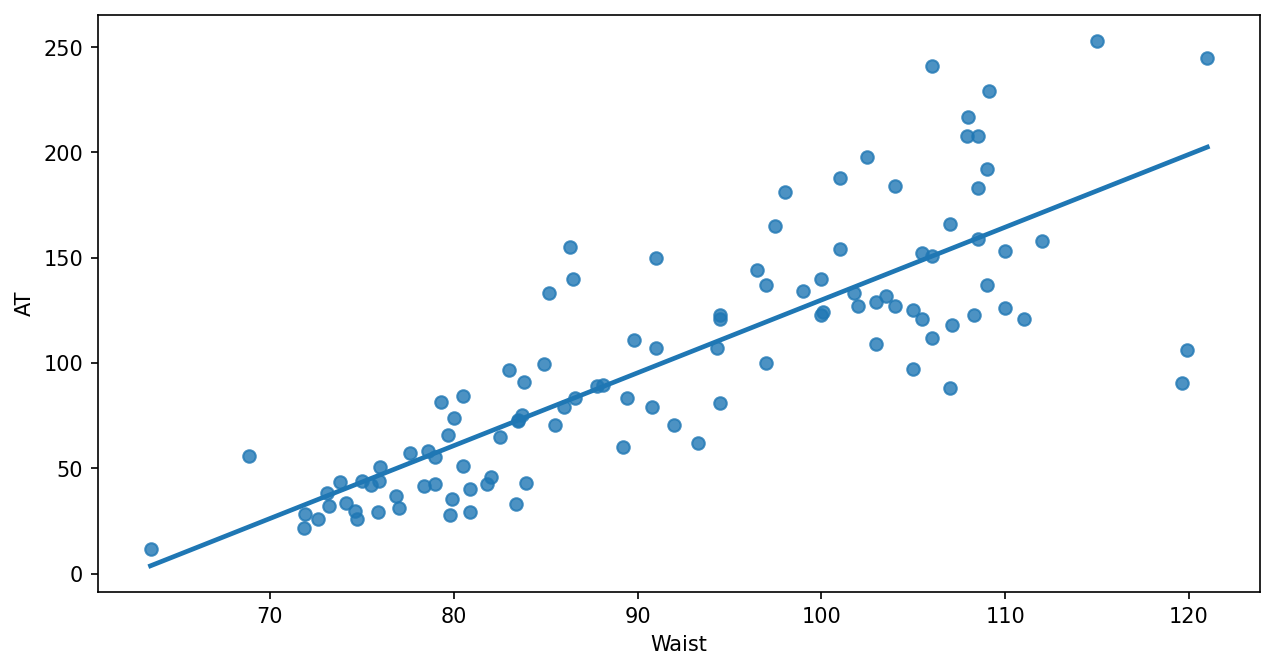

In [23]:
sns.regplot(x="Waist", y="AT", data=df,ci=None)
# if ci=None is not written it will show shaded part around the line.
# It is the size of the confidence interval for the regression estimate.
# This will be drawn using translucent bands around the regression line.

# Predict for new data point

In [24]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300]) # x value is (daily circulation) 200 at one branch and 300 at another branch

In [25]:
newdata

,0
0,200
1,300


In [26]:
data_pred=pd.DataFrame(newdata,columns=['Waist'])

In [27]:
data_pred

,Waist
0,200
1,300


In [28]:
model.predict(data_pred) # model - regression model

,0
0,475.79039
1,821.67633


In [29]:
# OR Create a dataframe using dictionary
data_pred2=pd.DataFrame({'Waist':[120,250,720,450,640,900]})
data_pred2

,Waist
0,120
1,250
2,720
3,450
4,640
5,900


In [30]:
model.predict(data_pred2)

,0
0,199.081639
1,648.733360
2,2274.397274
3,1340.505238
4,1997.688523
5,2896.991965


# **Data Transformation**

1.   Sqrt
2.   Log



**1. Log Transformation**

In [31]:
df

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [32]:
# To overcome the effect of outliers perform transformations. Skewed Histogram will become approximately equal to normal
# Log of every column can be taken. It doesn't change the pattern/information in data but changes values to different scales.
df['log_Waist'] = np.log(df['Waist'])
df

,Waist,AT,log_Waist
0,74.75,25.72,4.314149
1,72.60,25.89,4.284965
2,81.80,42.60,4.404277
3,83.95,42.80,4.430221
4,74.65,29.84,4.312811
...,...,...,...
104,100.10,124.00,4.606170
105,93.30,62.20,4.535820
106,101.80,133.00,4.623010
107,107.90,208.00,4.681205


In [33]:
df['log_AT'] = np.log(df['AT'])
df

,Waist,AT,log_Waist,log_AT
0,74.75,25.72,4.314149,3.247269
1,72.60,25.89,4.284965,3.253857
2,81.80,42.60,4.404277,3.751854
3,83.95,42.80,4.430221,3.756538
4,74.65,29.84,4.312811,3.395850
...,...,...,...,...
104,100.10,124.00,4.606170,4.820282
105,93.30,62.20,4.535820,4.130355
106,101.80,133.00,4.623010,4.890349
107,107.90,208.00,4.681205,5.337538


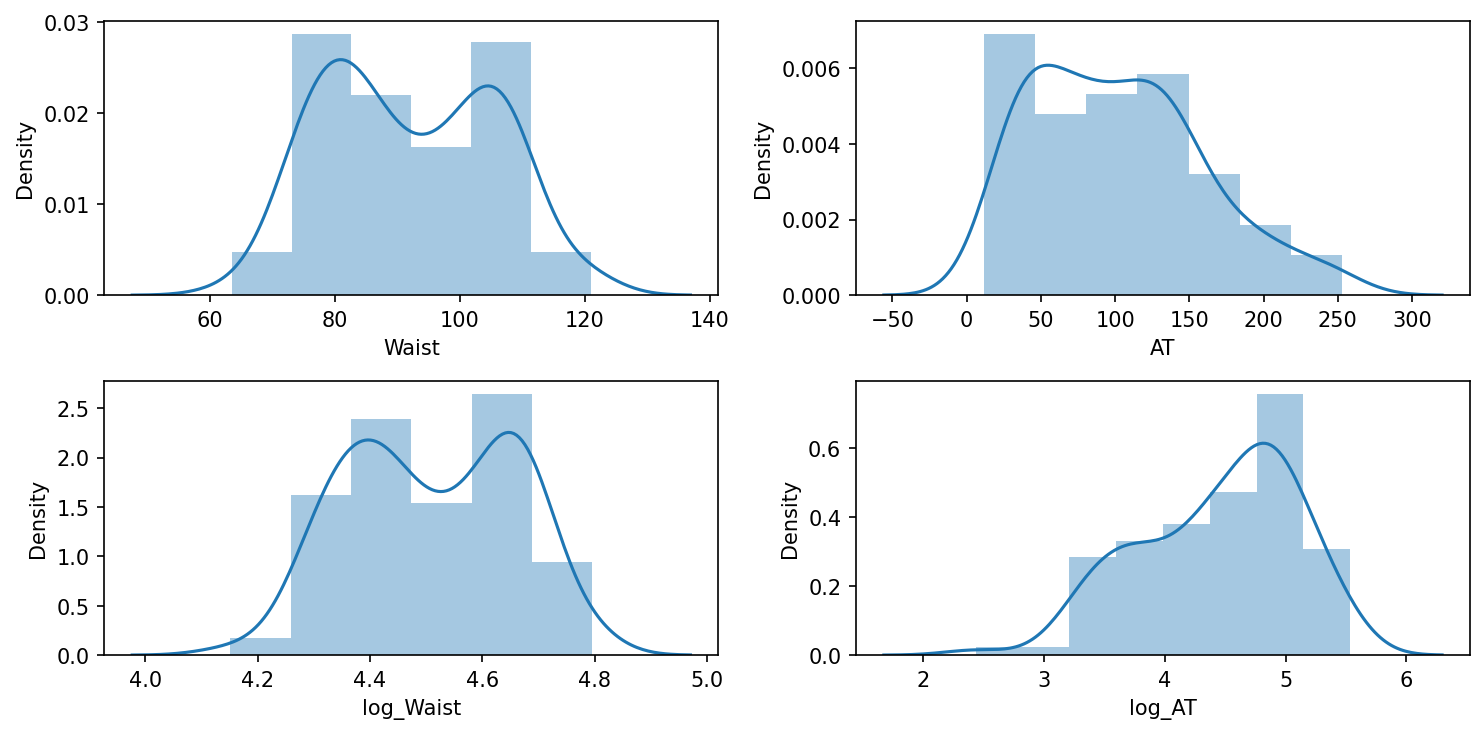

In [34]:
plt.subplot(2,2,1)
sns.distplot(df['Waist'])

plt.subplot(2,2,2)
sns.distplot(df['AT'])

plt.subplot(2,2,3)
sns.distplot(df['log_Waist'])

plt.subplot(2,2,4)
sns.distplot(df['log_AT'])

plt.tight_layout()
# as compared to previous graphs, skewness is reduced.

In [35]:
df['log_Waist'].skew(), df['log_AT'].skew() # moderate skewness is there
# To remove all skewness we have to remove all outliers from data

(-0.06473820276212063, -0.5313527034990406)

In [36]:
df['Waist'].skew(), df['AT'].skew() # High skewness.

(0.1340560824786468, 0.584869324127853)

# **2. Sqrt Transformation**
comparatively less effective than log transformation

In [37]:
df['sqrt_Waist'] = np.sqrt(df['Waist'])
df['sqrt_AT'] = np.sqrt(df['AT'])
df

,Waist,AT,log_Waist,log_AT,sqrt_Waist,sqrt_AT
0,74.75,25.72,4.314149,3.247269,8.645808,5.071489
1,72.60,25.89,4.284965,3.253857,8.520563,5.088222
2,81.80,42.60,4.404277,3.751854,9.044335,6.526868
3,83.95,42.80,4.430221,3.756538,9.162423,6.542171
4,74.65,29.84,4.312811,3.395850,8.640023,5.462600
...,...,...,...,...,...,...
104,100.10,124.00,4.606170,4.820282,10.004999,11.135529
105,93.30,62.20,4.535820,4.130355,9.659193,7.886698
106,101.80,133.00,4.623010,4.890349,10.089599,11.532563
107,107.90,208.00,4.681205,5.337538,10.387492,14.422205


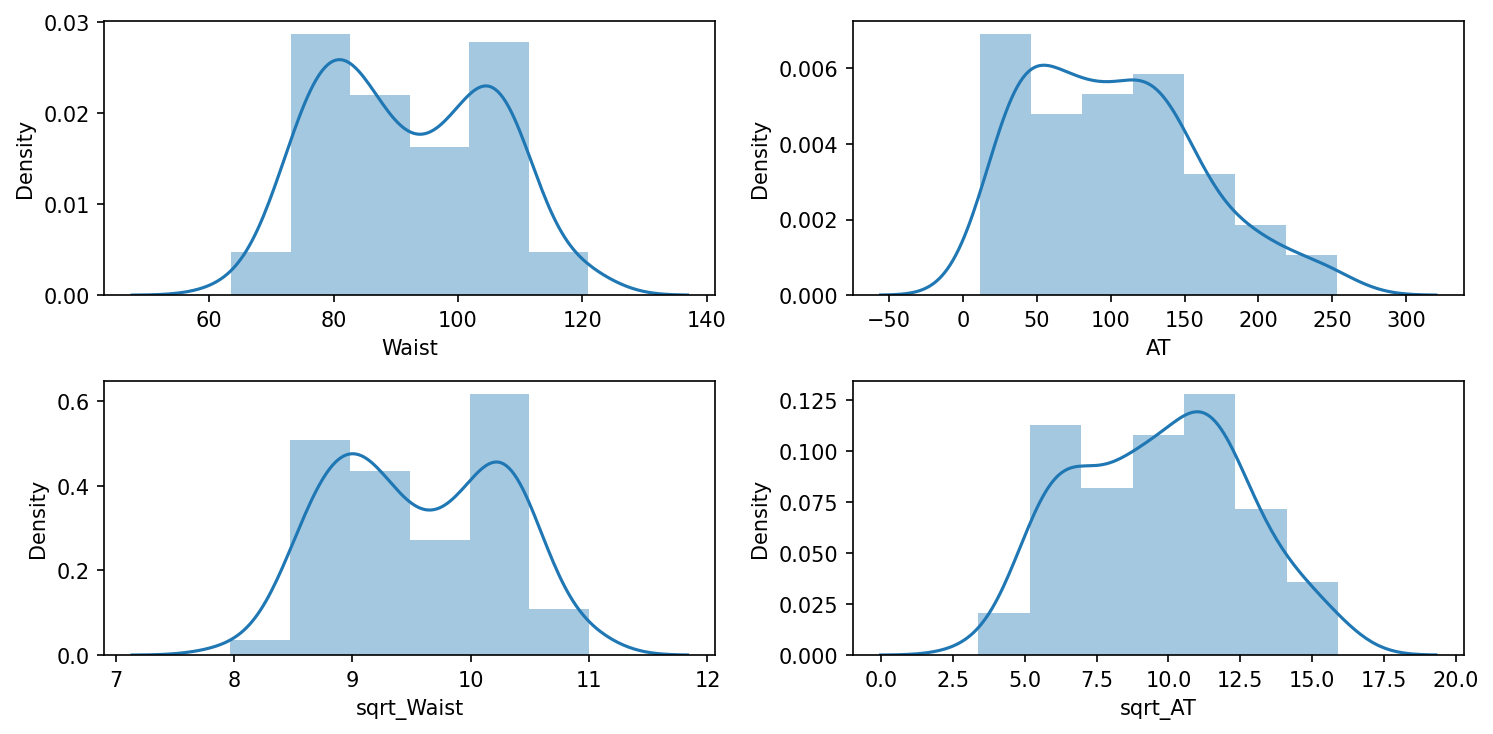

In [38]:
plt.subplot(2,2,1)
sns.distplot(df['Waist'])

plt.subplot(2,2,2)
sns.distplot(df['AT'])

plt.subplot(2,2,3)
sns.distplot(df['sqrt_Waist'])

plt.subplot(2,2,4)
sns.distplot(df['sqrt_AT'])

plt.tight_layout()

In [39]:
df['sqrt_Waist'].skew(), df['sqrt_AT'].skew()

(0.03581548461397095, 0.052120589976481134)